In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [6]:
input_file = 'data/665-molecular-Mpro-data.csv'
data = pd.read_csv(input_file)

In [21]:
data

,DrugName,binding_energy,TPSA,molecular_weight,XLogPs-AA,HBD,HBA,n_ROTB,n_benzene_ring,n_single_bond,n_double_bond,n_h,n_c,n_n,n_o,n_f
0,B1(OC(C(O1)(C)C)(C)C)c2cnc(nc2)C#N,7.004365,68.03,231.064,0.64748,0,5,1,1,11,0,14,11,3,2,0
1,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)S[Au])O)O...,7.004365,90.15,392.183,-2.01870,4,6,2,0,13,0,11,6,0,5,0
2,C1CN(CCN1C(=O)CCl)S(=O)(=O)C2=CCS=C2,9.314783,57.69,310.828,-0.13560,1,3,3,0,14,5,15,10,2,3,0
3,C=CC(=O)N(c1ccc(cc1)C(F)(F)F)C(c2cc(cnc2)C#N)C...,8.521097,86.09,496.464,4.73038,1,4,8,3,16,3,20,26,4,2,4
4,C=CC(=O)N(c1ccc(cc1)C(F)(F)F)C(c2cc(cnc2)Cl)C(...,8.314930,62.30,505.899,5.51210,1,3,8,3,16,3,20,25,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,c1ccn2cnc(c2c1)NC(=O)Cc3cccc(c3)Cl,7.004365,46.40,285.734,3.16890,1,3,3,3,5,1,12,15,3,1,0
661,c1ccnc(c1)c2c(c[nH]n2)NC(=O)c3cccc4n3ccn4,7.004365,87.97,304.313,2.37170,2,5,3,4,4,1,12,16,6,1,0
662,c1cnc(nc1Cl)C#N,7.004365,49.57,139.545,1.00168,0,3,0,1,2,0,2,5,3,0,0
663,c1cscc1CN2CCN(CC2)C(=O)CCl,8.944124,23.55,258.774,1.63110,0,3,3,1,11,1,15,11,2,1,0


In [8]:
X = data.drop(columns=['DrugName', 'binding_energy'])
y = data['binding_energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

In [10]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
rmrpe = ((((y_test - y_pred.flatten()) / y_test) ** 2).mean()) ** 0.5 * 100
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Square Relative Percent Error: {rmrpe}%')

Mean Squared Error: 0.6444550507604364
Root Mean Squared Error: 0.8027795779418136
R^2 Score: 0.2403559834478295
Root Mean Square Relative Percent Error: 9.848723620234157%


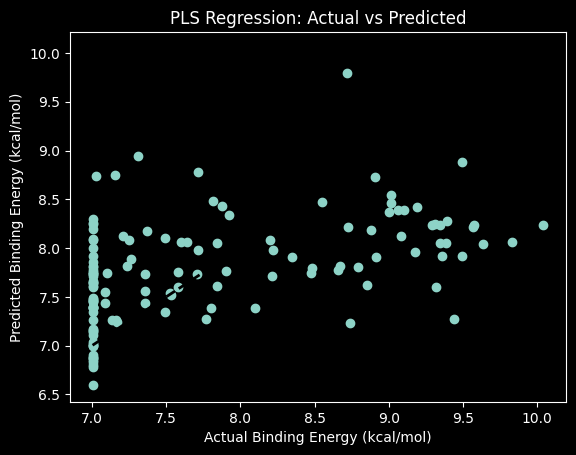

In [11]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Binding Energy (kcal/mol)')
plt.ylabel('Predicted Binding Energy (kcal/mol)')
plt.title('PLS Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.savefig(f"{plot_dir}/actual_vs_pred_test.png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# 시각화용 공통 변수 준비
import numpy as np
import matplotlib.pyplot as plt

plot_dir = 'plots_240_traintest'
import os
os.makedirs(plot_dir, exist_ok=True)

train_pred = pls.predict(X_train).flatten()
test_pred = y_pred.flatten()

train_resid = y_train.values - train_pred
test_resid = y_test.values - test_pred
abs_err = np.abs(test_resid)

minv = min(y.min(), train_pred.min(), test_pred.min())
maxv = max(y.max(), train_pred.max(), test_pred.max())


**해석**
- 이후 플롯에서 사용할 예측값/잔차/범위 등을 계산했습니다. 이 셀은 시각화를 위한 전처리이며 그래프 자체 해석은 다음 셀에서 진행합니다.


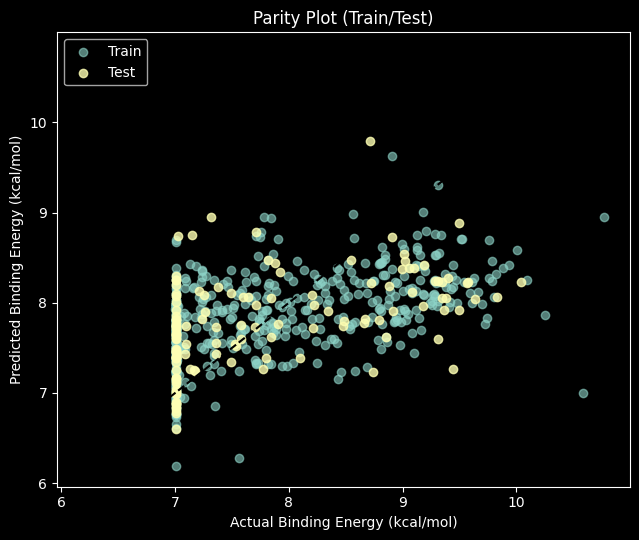

In [13]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# 패리티 플롯 (Train/Test)
plt.figure(figsize=(6.5, 5.5))
plt.scatter(y_train, train_pred, alpha=0.6, label='Train')
plt.scatter(y_test, test_pred, alpha=0.8, label='Test')
plt.plot([minv, maxv], [minv, maxv], 'k--', lw=1.5)
plt.xlabel('Actual Binding Energy (kcal/mol)')
plt.ylabel('Predicted Binding Energy (kcal/mol)')
plt.title('Parity Plot (Train/Test)')
plt.legend()
plt.tight_layout()
plt.savefig(f"{plot_dir}/parity_train_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 대각선(실측=예측)에 가까울수록 예측 성능이 좋습니다.
- Train 점들이 Test보다 대각선에 훨씬 밀집되어 있으면 과적합 가능성이 있습니다.
- Test에서 특정 구간만 멀어지면 그 구간의 화학적 특성(또는 데이터 희소성) 때문에 예측이 어려울 수 있습니다.


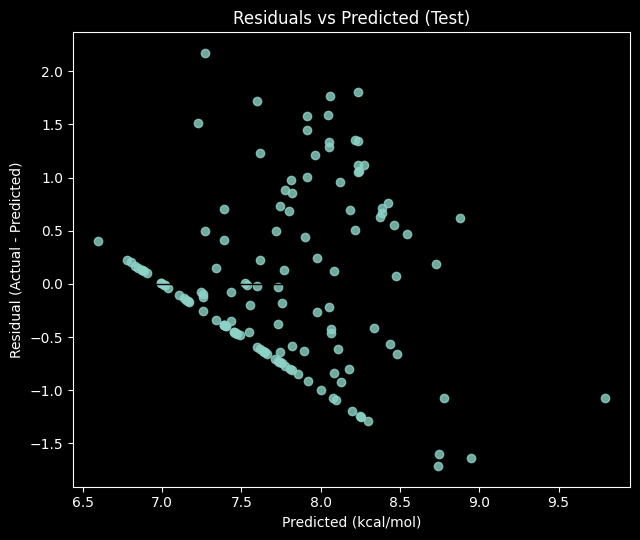

In [14]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# 잔차 vs 예측값 (Test)
plt.figure(figsize=(6.5, 5.5))
plt.scatter(test_pred, test_resid, alpha=0.8)
plt.axhline(0, color='k', lw=1)
plt.xlabel('Predicted (kcal/mol)')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted (Test)')
plt.tight_layout()
plt.savefig(f"{plot_dir}/residuals_vs_pred_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 잔차가 0선 주변에 고르게 분포하면 체계적 편향이 적습니다.
- 예측값이 커질수록 잔차 분산이 커지면 이분산성(heteroscedasticity) 가능성이 있습니다.
- 특정 예측 구간에서 잔차가 한쪽으로 치우치면 그 구간의 예측이 지속적으로 과대/과소 추정되고 있음을 의미합니다.


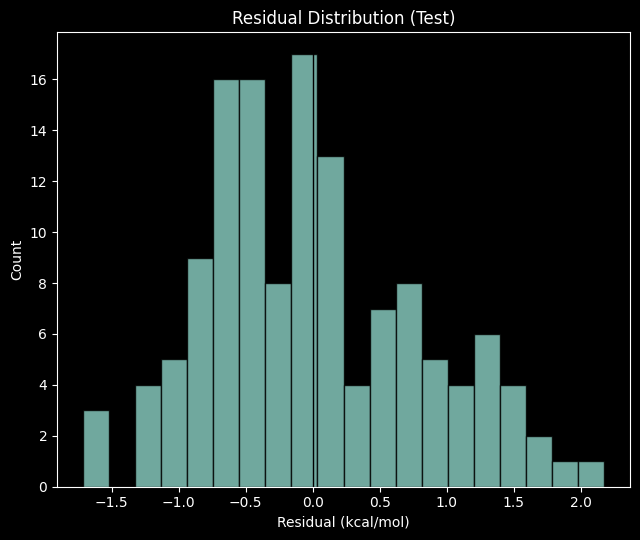

In [15]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# 잔차 분포 (Test)
plt.figure(figsize=(6.5, 5.5))
plt.hist(test_resid, bins=20, edgecolor='k', alpha=0.8)
plt.axvline(0, color='k', lw=1)
plt.xlabel('Residual (kcal/mol)')
plt.ylabel('Count')
plt.title('Residual Distribution (Test)')
plt.tight_layout()
plt.savefig(f"{plot_dir}/residual_distribution_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 잔차 분포가 0을 중심으로 대칭이면 전반적 편향이 작습니다.
- 한쪽으로 치우치면 지속적인 과대/과소 추정이 있음을 시사합니다.
- 꼬리가 두껍거나 이상치가 많으면 특정 화합물에서 큰 오차가 발생함을 의미합니다.


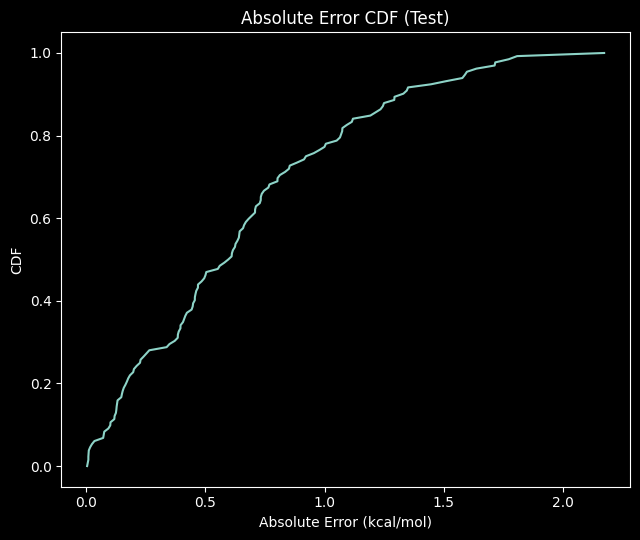

In [16]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# 절대오차 CDF (Test)
plt.figure(figsize=(6.5, 5.5))
sorted_abs = np.sort(abs_err)
plt.plot(sorted_abs, np.linspace(0, 1, len(sorted_abs), endpoint=True))
plt.xlabel('Absolute Error (kcal/mol)')
plt.ylabel('CDF')
plt.title('Absolute Error CDF (Test)')
plt.tight_layout()
plt.savefig(f"{plot_dir}/absolute_error_cdf_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- CDF가 빠르게 1에 접근할수록 대부분의 샘플이 작은 오차를 갖습니다.
- 예: CDF=0.8일 때의 x값은 80% 샘플이 그 오차 이하임을 의미합니다.
- 곡선이 완만하면 큰 오차가 상대적으로 많이 존재합니다.


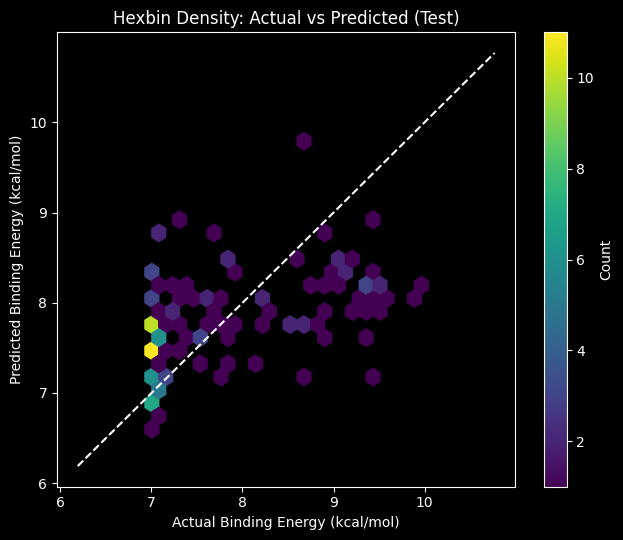

In [17]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# Hexbin 밀도 플롯 (Test)
plt.figure(figsize=(6.5, 5.5))
plt.hexbin(y_test, test_pred, gridsize=20, cmap='viridis', mincnt=1)
plt.plot([minv, maxv], [minv, maxv], 'w--', lw=1.5)
plt.xlabel('Actual Binding Energy (kcal/mol)')
plt.ylabel('Predicted Binding Energy (kcal/mol)')
plt.title('Hexbin Density: Actual vs Predicted (Test)')
plt.colorbar(label='Count')
plt.tight_layout()
plt.savefig(f"{plot_dir}/hexbin_density_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 점이 많은 영역을 밀도로 표시하여 데이터 집중 구간을 확인할 수 있습니다.
- 대각선 주변 밀도가 높다면 그 구간에서 예측이 안정적입니다.
- 밀도 덩어리가 대각선에서 벗어나 있으면 특정 범위에 체계적 오차가 있음을 의미합니다.


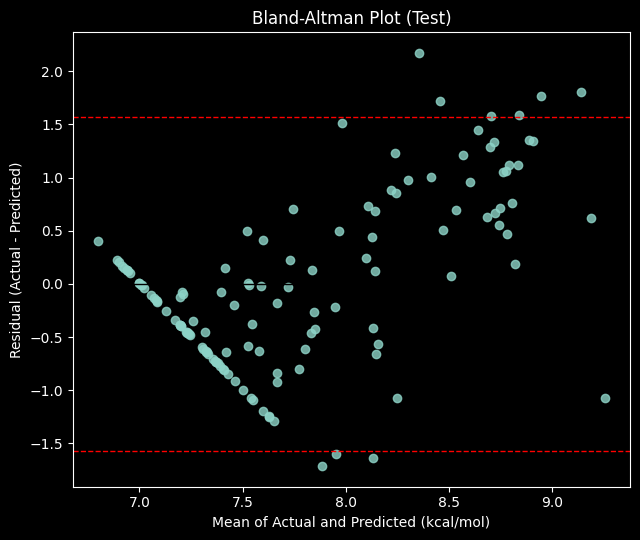

In [18]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# Bland-Altman 플롯 (Test)
mean_tp = (y_test.values + test_pred) / 2
plt.figure(figsize=(6.5, 5.5))
plt.scatter(mean_tp, test_resid, alpha=0.8)
plt.axhline(test_resid.mean(), color='k', lw=1)
plt.axhline(test_resid.mean() + 1.96 * test_resid.std(), color='r', lw=1, ls='--')
plt.axhline(test_resid.mean() - 1.96 * test_resid.std(), color='r', lw=1, ls='--')
plt.xlabel('Mean of Actual and Predicted (kcal/mol)')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Bland-Altman Plot (Test)')
plt.tight_layout()
plt.savefig(f"{plot_dir}/bland_altman_test.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 평균값 대비 잔차의 체계적 편향과 분산을 확인합니다.
- 중앙선(평균 잔차)이 0에서 멀면 전체적인 편향이 존재합니다.
- 점들이 95% 한계선(±1.96 SD) 밖에 자주 위치하면 예측 안정성이 낮습니다.


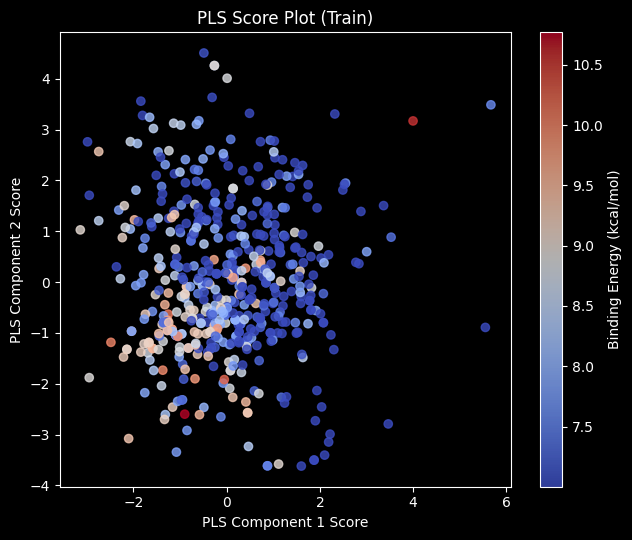

In [19]:
# PLS 컴포넌트 스코어 플롯 (Train)
if hasattr(pls, 'x_scores_'):
    xs = pls.x_scores_
    import os
    plot_dir = 'plots_240_traintest'
    os.makedirs(plot_dir, exist_ok=True)
    plt.figure(figsize=(6.5, 5.5))
    sc = plt.scatter(xs[:, 0], xs[:, 1], c=y_train.values, cmap='coolwarm', alpha=0.8)
    plt.xlabel('PLS Component 1 Score')
    plt.ylabel('PLS Component 2 Score')
    plt.title('PLS Score Plot (Train)')
    plt.colorbar(sc, label='Binding Energy (kcal/mol)')
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/pls_score_pc1_pc2_train.png", dpi=300, bbox_inches='tight')
    plt.show()


**해석**
- 1, 2번째 잠재변수 공간에서 샘플 분포와 타깃 값의 경향을 봅니다.
- 색(결합에너지)이 연속적으로 변화하면 해당 컴포넌트가 타깃과 잘 연관되어 있습니다.
- 군집이나 경계가 보이면 특정 화학적 패턴이 존재할 가능성이 있습니다.


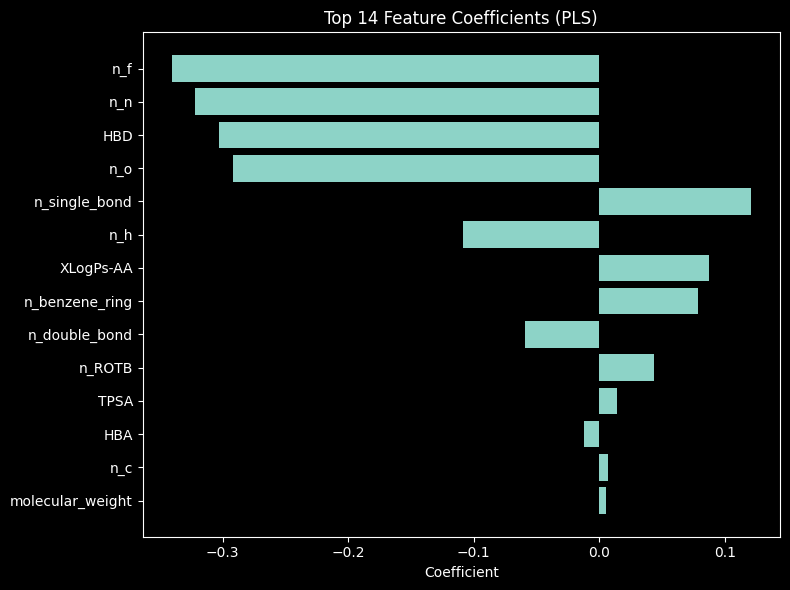

In [20]:
import os
plot_dir = 'plots_240_traintest'
os.makedirs(plot_dir, exist_ok=True)
# 상위 계수 특징 (PLS)
coef = pls.coef_.ravel()
feature_names = X.columns
order = np.argsort(np.abs(coef))[::-1]

top_n = min(15, len(feature_names))
idx = order[:top_n]

plt.figure(figsize=(8, 6))
plt.barh(range(top_n)[::-1], coef[idx])
plt.yticks(range(top_n)[::-1], feature_names[idx])
plt.xlabel('Coefficient')
plt.title(f'Top {top_n} Feature Coefficients (PLS)')
plt.tight_layout()
plt.savefig(f"{plot_dir}/top_features_pls.png", dpi=300, bbox_inches='tight')
plt.show()


**해석**
- 절대값이 큰 계수일수록 예측에 더 큰 영향을 주는 특징입니다.
- 양수/음수 부호는 결합에너지에 대한 방향성(증가/감소)을 나타냅니다.
- 상위 특징이 너무 소수에 집중되면 모델이 특정 지표에 과도하게 의존할 수 있습니다.
